In [83]:
from my_functions import*

In [84]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

In [ ]:
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

#Select range of events
nmin1=100
nmax1=4000

#Select quality 0 Z->mumu
Zmumu_pt=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin1:nmax1]
Zmumu_eta=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin1:nmax1]
Zmumu_phi=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin1:nmax1]

#And select the Z peak pairs
Zmumu_pt1, Zmumu_eta1, Zmumu_phi1= get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

nmin2=100
nmax2=100000
ZeroBias_eta1=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin2:nmax2]
ZeroBias_phi1=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin2:nmax2]
ZeroBias_pt1=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin2:nmax2]

#Select range of events
nmin3=100
nmax3=8000

#Select quality 0 Z->mumu
Zmumu_pt=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin3:nmax3]
Zmumu_eta=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin3:nmax3]
Zmumu_phi=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin3:nmax3]
#And select the Z peak pairs
Zmumu_pt2, Zmumu_eta2, Zmumu_phi2= get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

nmin4=100
nmax4=8000
ZeroBias_eta2=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin4:nmax4]
ZeroBias_phi2=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin4:nmax4]
ZeroBias_pt2=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin4:nmax4]

100%|██████████| 7900/7900 [00:10<00:00, 768.32it/s]


energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


In [86]:
#Compute isolations
dr_min=0.1
dr_max=0.3

res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta1, Zmumu_phi1, dr_min, dr_max, event_range=[nmin1, nmax1], batch_size=int((nmax1-nmin1)/10))
res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta1, ZeroBias_phi1, dr_min, dr_max, [nmin2, nmax2], int((nmax2-nmin2)/30))
res3=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta2, Zmumu_phi2, dr_min, dr_max, event_range=[nmin3, nmax3], batch_size=int((nmax3-nmin3)/10))
res4=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta2, ZeroBias_phi2, dr_min, dr_max, [nmin4, nmax4], int((nmax4-nmin4)/10))

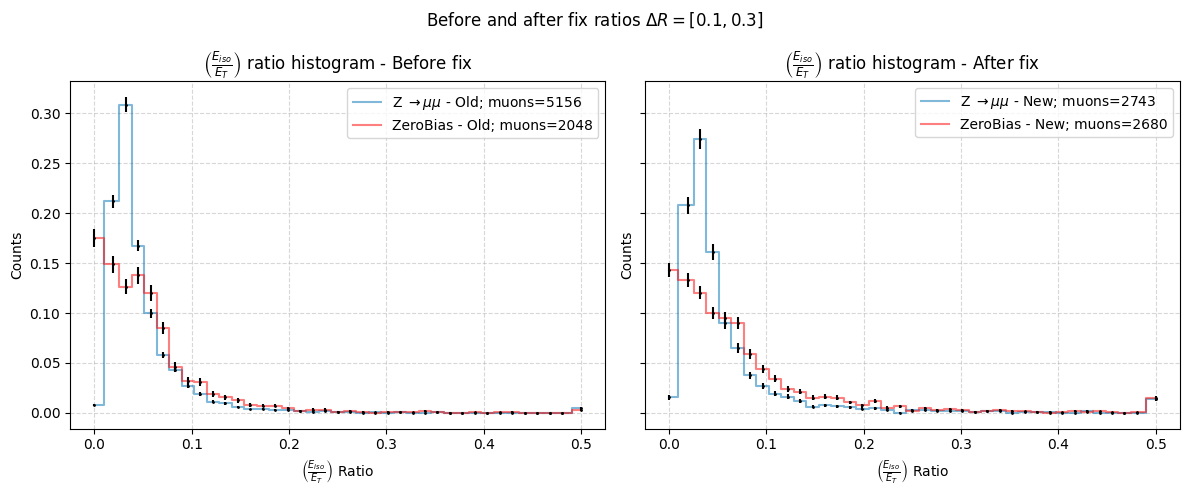

In [87]:
# Compute ratios and number of muons
r1 = ak.flatten(res1) / ak.flatten(Zmumu_pt1)
l1 = len(r1[~np.isnan(r1)])

r2 = ak.flatten(res2) / ak.flatten(ZeroBias_pt1)
l2 = len(r2[~np.isnan(r2)])

r3 = ak.flatten(res3) / ak.flatten(Zmumu_pt2)
l3 = len(r3[~np.isnan(r3)])

r4 = ak.flatten(res4) / ak.flatten(ZeroBias_pt2)
l4 = len(r4[~np.isnan(r4)])

bins = np.linspace(0, 0.5, 40)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


# Second subplot
coolplot([r3, r4], bins,
         labels=[rf"Z $\rightarrow \mu \mu$ - Old; muons={l3}", 
                 f"ZeroBias - Old; muons={l4}"],
         ax=axs[0])
axs[0].set_title(r"$\left(\frac{E_{iso}}{E_T}\right)$ ratio histogram - Before fix")
# First subplot
coolplot([r1, r2], bins,
         labels=[rf"Z $\rightarrow \mu \mu$ - New; muons={l1}", 
                 f"ZeroBias - New; muons={l2}"],
         ax=axs[1])
axs[1].set_title(r"$\left(\frac{E_{iso}}{E_T}\right)$ ratio histogram - After fix")

# Global formatting
for ax in axs:
    ax.set_xlabel(r"$\left(\frac{E_{iso}}{E_T}\right)$ Ratio")
    ax.set_ylabel("Counts")
    ax.legend()

plt.suptitle(r"Before and after fix ratios $\Delta R = [0.1, 0.3]$")
plt.tight_layout()
plt.show()

In [88]:
bins=np.linspace(0,1,1000)

Zmumu_counts, _ = np.histogram(r1, bins)
ZeroBias_counts, _ = np.histogram(r2, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR1 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR1 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

Zmumu_counts, _ = np.histogram(r3, bins)
ZeroBias_counts, _ = np.histogram(r4, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR2 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR2 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

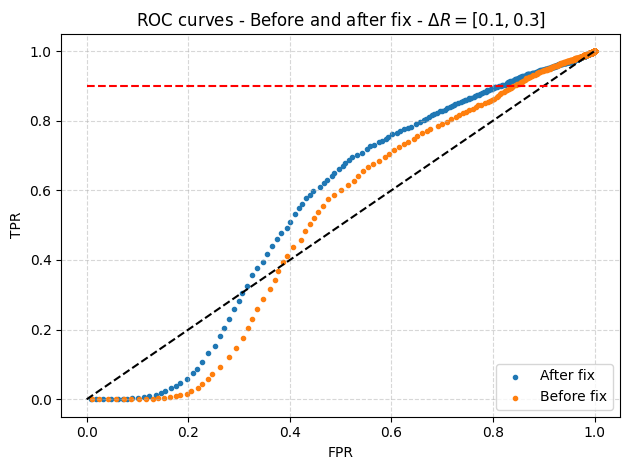

In [89]:
plt.scatter(FPR1, TPR1, marker='.', label="After fix")
plt.scatter(FPR2, TPR2, marker='.', label="Before fix")
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.plot([0,1],[0.9,0.9],color='r', linestyle='--')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title(r"ROC curves - Before and after fix - $\Delta R = [0.1, 0.3]$")
plt.tight_layout()
plt.show()

In [90]:
#Compute isolations
dr_min=0.1
dr_max=1

res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta1, Zmumu_phi1, dr_min, dr_max, event_range=[nmin1, nmax1], batch_size=int((nmax1-nmin1)/10))
res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta1, ZeroBias_phi1, dr_min, dr_max, [nmin2, nmax2], int((nmax2-nmin2)/30))
res3=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta2, Zmumu_phi2, dr_min, dr_max, event_range=[nmin3, nmax3], batch_size=int((nmax3-nmin3)/10))
res4=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta2, ZeroBias_phi2, dr_min, dr_max, [nmin4, nmax4], int((nmax4-nmin4)/10))

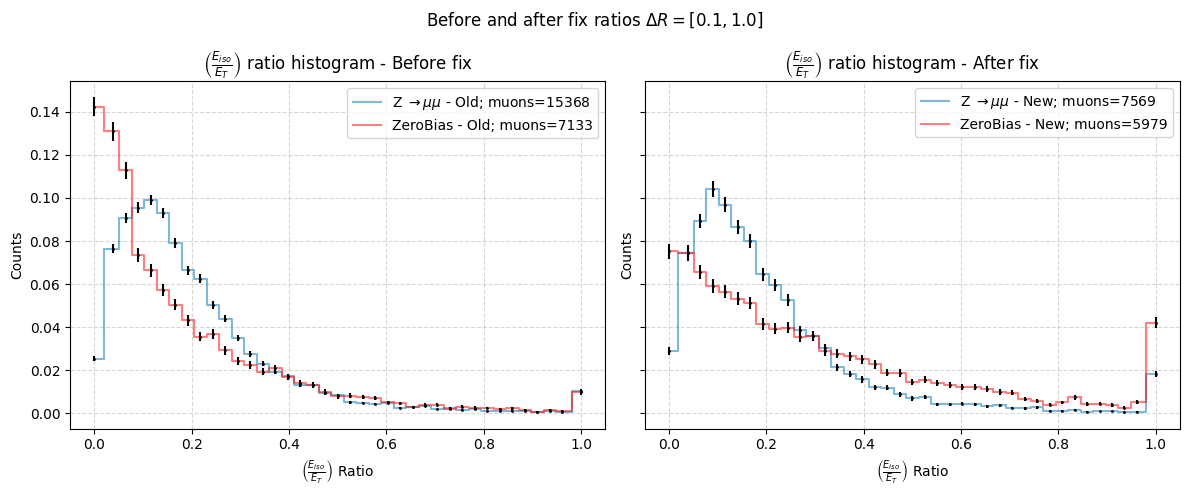

In [91]:
# Compute ratios and number of muons
r1 = ak.flatten(res1) / ak.flatten(Zmumu_pt1)
l1 = len(r1[~np.isnan(r1)])

r2 = ak.flatten(res2) / ak.flatten(ZeroBias_pt1)
l2 = len(r2[~np.isnan(r2)])

r3 = ak.flatten(res3) / ak.flatten(Zmumu_pt2)
l3 = len(r3[~np.isnan(r3)])

r4 = ak.flatten(res4) / ak.flatten(ZeroBias_pt2)
l4 = len(r4[~np.isnan(r4)])

bins = np.linspace(0, 1, 40)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


# Second subplot
coolplot([r3, r4], bins,
         labels=[rf"Z $\rightarrow \mu \mu$ - Old; muons={l3}", 
                 f"ZeroBias - Old; muons={l4}"],
         ax=axs[0])
axs[0].set_title(r"$\left(\frac{E_{iso}}{E_T}\right)$ ratio histogram - Before fix")
# First subplot
coolplot([r1, r2], bins,
         labels=[rf"Z $\rightarrow \mu \mu$ - New; muons={l1}", 
                 f"ZeroBias - New; muons={l2}"],
         ax=axs[1])
axs[1].set_title(r"$\left(\frac{E_{iso}}{E_T}\right)$ ratio histogram - After fix")

# Global formatting
for ax in axs:
    ax.set_xlabel(r"$\left(\frac{E_{iso}}{E_T}\right)$ Ratio")
    ax.set_ylabel("Counts")
    ax.legend()

plt.suptitle(r"Before and after fix ratios $\Delta R = [0.1, 1.0]$")
plt.tight_layout()
plt.show()

In [92]:
bins=np.linspace(0,2,1000)

Zmumu_counts, _ = np.histogram(r1, bins)
ZeroBias_counts, _ = np.histogram(r2, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR1 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR1 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

Zmumu_counts, _ = np.histogram(r3, bins)
ZeroBias_counts, _ = np.histogram(r4, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR2 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR2 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

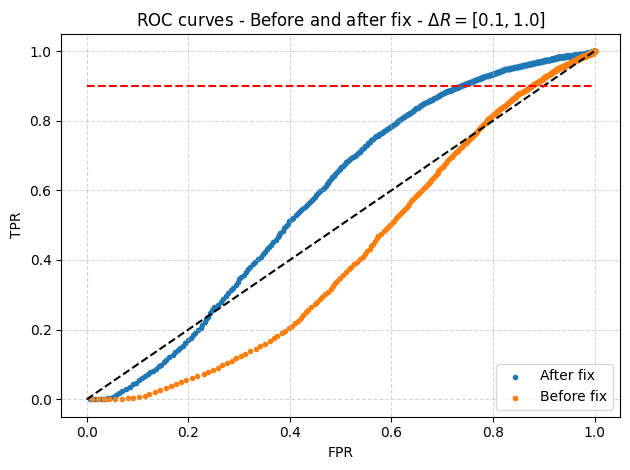

In [93]:
plt.scatter(FPR1, TPR1, marker='.', label="After fix")
plt.scatter(FPR2, TPR2, marker='.', label="Before fix")
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.plot([0,1],[0.9,0.9],color='r', linestyle='--')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title(r"ROC curves - Before and after fix - $\Delta R = [0.1, 1.0]$")
plt.tight_layout()
plt.show()

In [94]:
#Compute isolations
dr_min=0.1
dr_max=0.5

res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta1, Zmumu_phi1, dr_min, dr_max, event_range=[nmin1, nmax1], batch_size=int((nmax1-nmin1)/10))
res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta1, ZeroBias_phi1, dr_min, dr_max, [nmin2, nmax2], int((nmax2-nmin2)/30))
res3=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta2, Zmumu_phi2, dr_min, dr_max, event_range=[nmin3, nmax3], batch_size=int((nmax3-nmin3)/10))
res4=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta2, ZeroBias_phi2, dr_min, dr_max, [nmin4, nmax4], int((nmax4-nmin4)/10))

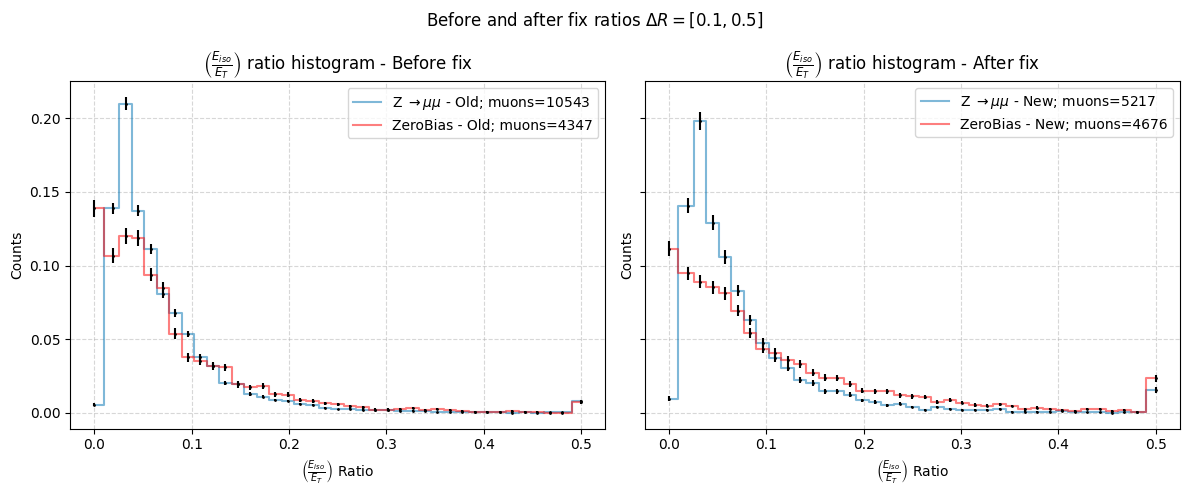

In [95]:
# Compute ratios and number of muons
r1 = ak.flatten(res1) / ak.flatten(Zmumu_pt1)
l1 = len(r1[~np.isnan(r1)])

r2 = ak.flatten(res2) / ak.flatten(ZeroBias_pt1)
l2 = len(r2[~np.isnan(r2)])

r3 = ak.flatten(res3) / ak.flatten(Zmumu_pt2)
l3 = len(r3[~np.isnan(r3)])

r4 = ak.flatten(res4) / ak.flatten(ZeroBias_pt2)
l4 = len(r4[~np.isnan(r4)])

bins = np.linspace(0, 0.5, 40)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


# Second subplot
coolplot([r3, r4], bins,
         labels=[rf"Z $\rightarrow \mu \mu$ - Old; muons={l3}", 
                 f"ZeroBias - Old; muons={l4}"],
         ax=axs[0])
axs[0].set_title(r"$\left(\frac{E_{iso}}{E_T}\right)$ ratio histogram - Before fix")
# First subplot
coolplot([r1, r2], bins,
         labels=[rf"Z $\rightarrow \mu \mu$ - New; muons={l1}", 
                 f"ZeroBias - New; muons={l2}"],
         ax=axs[1])
axs[1].set_title(r"$\left(\frac{E_{iso}}{E_T}\right)$ ratio histogram - After fix")

# Global formatting
for ax in axs:
    ax.set_xlabel(r"$\left(\frac{E_{iso}}{E_T}\right)$ Ratio")
    ax.set_ylabel("Counts")
    ax.legend()

plt.suptitle(r"Before and after fix ratios $\Delta R = [0.1, 0.5]$")
plt.tight_layout()
plt.show()

In [96]:
bins=np.linspace(0,1,1000)

Zmumu_counts, _ = np.histogram(r1, bins)
ZeroBias_counts, _ = np.histogram(r2, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR1 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR1 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

Zmumu_counts, _ = np.histogram(r3, bins)
ZeroBias_counts, _ = np.histogram(r4, bins)
#Compute the cumulative sum of the counts (like integrating the histogram to the left)
Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
# Normalize to total events
TPR2 = Zmumu_cumulative_counts / np.sum(Zmumu_counts)
FPR2 = ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

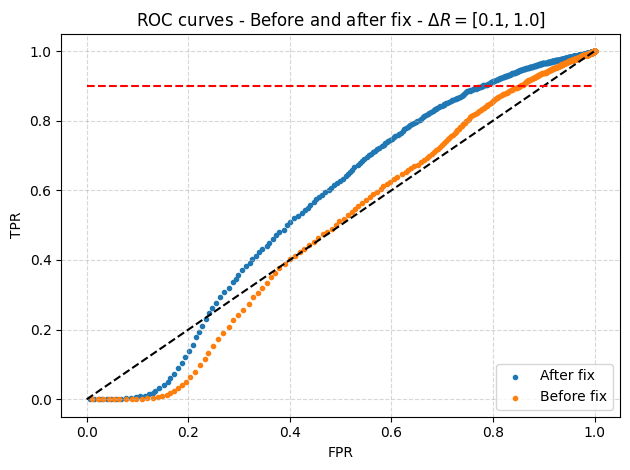

In [97]:
plt.scatter(FPR1, TPR1, marker='.', label="After fix")
plt.scatter(FPR2, TPR2, marker='.', label="Before fix")
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.plot([0,1],[0.9,0.9],color='r', linestyle='--')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title(r"ROC curves - Before and after fix - $\Delta R = [0.1, 1.0]$")
plt.tight_layout()
plt.show()

In [98]:

dr_mins=[0.1, 0.1, 0.1]
dr_maxs=[0.3, 1.0, 1.5]

ROC_curve=[]
lens=[]
bins=np.linspace(0,3,1000)
for i in tqdm(range(len(dr_mins))):
    #Compute isolations
    res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta1, Zmumu_phi1, dr_mins[i], dr_maxs[i], event_range=[nmin1, nmax1], batch_size=int((nmax1-nmin1)/10))
    res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta1, ZeroBias_phi1, dr_mins[i], dr_maxs[i], [nmin2, nmax2], int((nmax2-nmin2)/10))
    #Flatten
    res1=ak.flatten(res1)
    res2=ak.flatten(res2)
    #Compute ratios
    r1=res1/ak.flatten(Zmumu_pt1)
    r2=res2/ak.flatten(ZeroBias_pt1)
    l1=len(r1[~np.isnan(r1)])
    l2=len(r2[~np.isnan(r2)])
    #Compute histogram
    Zmumu_counts, _ = np.histogram(r1, bins)
    ZeroBias_counts, _ = np.histogram(r2, bins)
    #Compute the cumulative sum of the counts (like integrating the histogram to the left)
    Zmumu_cumulative_counts = np.cumsum(Zmumu_counts)
    ZeroBias_cumulative_counts = np.cumsum(ZeroBias_counts)
    # Normalize to total events
    TPR=Zmumu_cumulative_counts / np.sum(Zmumu_counts)
    FPR= ZeroBias_cumulative_counts / np.sum(ZeroBias_counts)

    ROC_curve.append([FPR, TPR])
    lens.append([l1, l2])

100%|██████████| 3/3 [01:54<00:00, 38.16s/it]


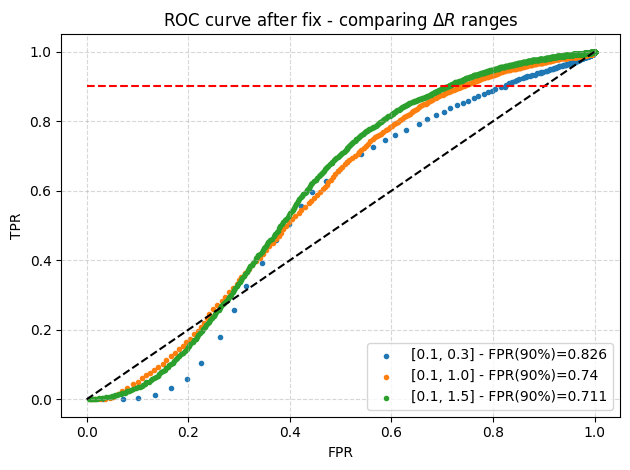

In [99]:
for i in range(len(dr_mins)):
    FPR, TPR = ROC_curve[i]
    FPR_90=min(FPR[TPR >= 0.9])
    plt.scatter(FPR, TPR, marker='.', label=f"[{dr_mins[i]}, {dr_maxs[i]}] - FPR(90%)={np.round(FPR_90,3)}")

plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.plot([0,1],[0.9,0.9],color='r', linestyle='--')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title(r"ROC curve after fix - comparing $\Delta R$ ranges")
plt.tight_layout()
plt.show()

BEST RANGES:
1. [0.15, 0.3] -> FPR = 0,768
2. [0.1, 0.3] -> FPR = 0.778 -> little change
3. [0.1, 0.4] -> FPR = 0.754
4. [0.1, 0.5] -> FPR = 0.748